# What is Employee attrition ?

Employee attrition is defined as the natural process by which employees leave the workforce . 

# okay let's think in General using our common sense !

## What caused employee to leave his or her workplace or company  ?

 * Being overworked ! 
 * No worklife balance .
 * May be employee hates travelling frequently .
 * May be employee hates his/her boss .
 * May be employee Dailywage is less for more work .
 * May be employee hates to work in the current Department .
 * May be Distance between home and workplace is more .
 * May be employee not getting promotion for his/her work .
 * May be Salary is low .
 * May be his/her Personal problem .
 * May be he/she got better job with better pacakage .
 * May be employee's are not getting recognaized for his/her work .
 * May be employee a frequently job changer (who never sticks with one company ).
 * May be Lack of Growth and Progression  .

# What caused employee to Stay in his or her workplace or company ?

 * worklife balance .
 * work satisfaction .
 * employee loves to work in the current Department .
 * Distance between home and workplace is less .
 * employee  getting promotion for his/her work .
 * Salary is good .
 * employees are  getting recognaized for his/her work .
 * Growth and Progression  .

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [287]:
data = pd.read_csv("employee_attrition.csv")
data = pd.DataFrame(data)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Preprocessing .

In [288]:
data.columns = [i.lower() for i in data.columns]

In [289]:
# dropping employeecount,over18,standardhours columns because these columns will not be 
# helpful in our analysis .
print("Features having only one value for all of it's index \n")
for i  in data.columns:
    if(data[i].nunique()==1):
        print(i)
print("\n")
data.drop(['employeecount','over18','standardhours',"employeenumber"],axis = 1,inplace = True)
data.columns

Features having only one value for all of it's index 

employeecount
over18
standardhours




Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [290]:
data.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [291]:
# let's rename columns for improved readablity .

data.rename(columns = {
                       "businesstravel" :"travel",
                        "dailyrate":"daily_salary",
                        "distancefromhome":"dist_from_home",
                        "environmentsatisfaction" : "env_satisfaction",
                        "monthlyrate" : "monthly_salary" ,
                        "numcompaniesworked":"companies_worked",
                        "percentsalaryhike" : "hike",
                        "performancerating" : "performance",
                        "relationshipsatisfaction" : "relationship_satisfaction" ,
                        "totalworkingyears" : "experience",
                        "yearsatcompany" : "years_in_company" ,
                        "yearsincurrentrole" : "years_in_currentrole",
                       "yearssincelastpromotion" : "last_promotion" ,
                        "yearswithcurrmanager" :"years_with_current_manager ",
                        "trainingtimeslastyear" :"training"                                   
                      },inplace = True )

In [292]:
data.head(5)

,age,attrition,travel,daily_salary,department,dist_from_home,education,educationfield,env_satisfaction,gender,...,performance,relationship_satisfaction,stockoptionlevel,experience,training,worklifebalance,years_in_company,years_in_currentrole,last_promotion,years_with_current_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [293]:
data.drop(["daily_salary","monthlyincome"],inplace = True,axis = 1)

# Checking for null values . 

In [294]:
print("we don't have missing values in our dataset : \n")
data.isnull().sum()

we don't have missing values in our dataset : 



age                            0
attrition                      0
travel                         0
department                     0
dist_from_home                 0
education                      0
educationfield                 0
env_satisfaction               0
gender                         0
hourlyrate                     0
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                  0
monthly_salary                 0
companies_worked               0
overtime                       0
hike                           0
performance                    0
relationship_satisfaction      0
stockoptionlevel               0
experience                     0
training                       0
worklifebalance                0
years_in_company               0
years_in_currentrole           0
last_promotion                 0
years_with_current_manager     0
dtype: int64

In [295]:
catgorical_data = data.select_dtypes(exclude = "number")
print("catgorical columns of dataset : ")
catgorical_data.columns

catgorical columns of dataset : 


Index(['attrition', 'travel', 'department', 'educationfield', 'gender',
       'jobrole', 'maritalstatus', 'overtime'],
      dtype='object')

In [296]:
numerical_data = data.select_dtypes(include = "number")
print("numerical columns of dataset : ")
numerical_data.columns

numerical columns of dataset : 


Index(['age', 'dist_from_home', 'education', 'env_satisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthly_salary',
       'companies_worked', 'hike', 'performance', 'relationship_satisfaction',
       'stockoptionlevel', 'experience', 'training', 'worklifebalance',
       'years_in_company', 'years_in_currentrole', 'last_promotion',
       'years_with_current_manager '],
      dtype='object')

In [297]:
# target re-aranging 
# 1 - means person will leave company .
# 0 - means person will not leave the company .
data.attrition =  data.attrition.map({"Yes":1,"No":0})

# Let's see weather our target is balanced or not . 

Target count : 

0    1233
1     237
Name: attrition, dtype: int64


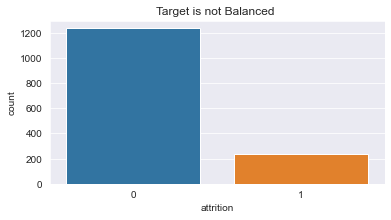

In [298]:
print("Target count : \n")
print(data['attrition'].value_counts())
sns.countplot(data['attrition']).set_title("Target is not Balanced ")
plt.show()

In [299]:
# For our analysis purpose we are  consider equal number of target labels . (although this is not recommended )

turnover    = data[data["attrition"]==1]  
no_turnover = data[data["attrition"]==0].sample(len(turnover)) 
print(turnover.shape)
print(no_turnover.shape)

(237, 29)
(237, 29)


# Explantory Data Analysis . 

## What caused employee to leave his or her (workplace) company ?

### 1 .  'attrition v/s travel '
 here what i found from the below chart is that 
   *  most of the people  who  leave the company are the one who travel Frequently compared to people       who don't   .


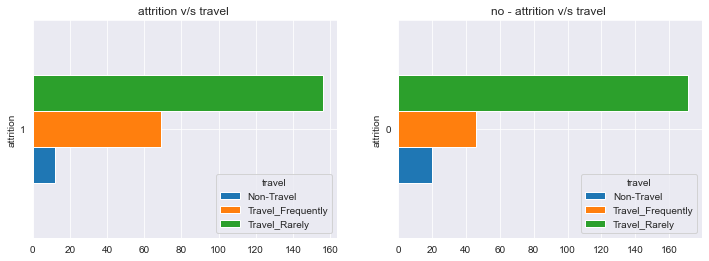

In [300]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
pd.crosstab(turnover["attrition"],turnover["travel"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s travel ')
pd.crosstab(no_turnover["attrition"],no_turnover["travel"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s travel ')
plt.show()

# 2. 'attrition v/s department' 


* Most of the people who left the company are from the research and development department 
  and most of the people who are working in company are from the research and development department. 
  
  By this we conclude that which ever the company this dataset belongs has vast employees 
  in R&D Department .

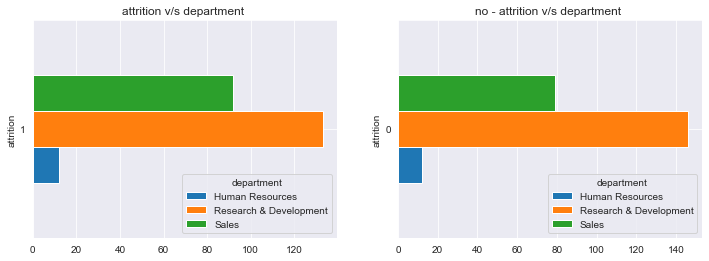

In [301]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
pd.crosstab(turnover["attrition"],turnover["department"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s department ')
pd.crosstab(no_turnover["attrition"],no_turnover["department"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s department ')
plt.show()

# 3.  " Distance from home "
insight : Most of the employee's , distance from home to workplace are in less than 10km . 

In [302]:
lt_10kms = data['dist_from_home'][data['dist_from_home']<=10].count()
gt_10kms = data['dist_from_home'][data['dist_from_home']>10].count()
print("Number of employee's whose distance from home to workplace less than or equal to 10kms : ",lt_10kms)
print("Number of employee's whose distance from home to workplace greater than 10kms   : ",gt_10kms)

Number of employee's whose distance from home to workplace less than or equal to 10kms :  1026
Number of employee's whose distance from home to workplace greater than 10kms   :  444


Text(0.5, 0, 'work home distance in kms ')

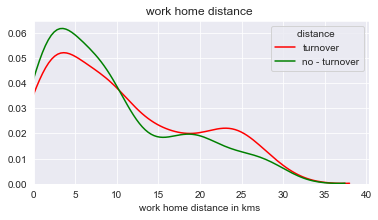

In [303]:
sns.kdeplot(turnover['dist_from_home'],shade = False,color = "r",legend = False).set(xlim=(0))
sns.kdeplot(no_turnover['dist_from_home'],shade = False,color = "g").set(xlim=(0))
plt.legend(title='distance ', loc='upper right', labels=['turnover', 'no - turnover'])
plt.title("work home distance ")
plt.xlabel("work home distance in kms ")

# 4 . "attrition v/s env_satisfaction "

env_satisfaction : 
    1 - bieng lowest .
    4 - being highest .

* insight : env_satisfaction  feature play's an important role ,because the working environment should be good,if it is not employee's tend to leave thier company .

          * from the below chart we conclude that employee with env_satistfcation  = 1
          (being lowest) are the one who left the comapny most .
            
           # and again
            
          * from the below chart we conclude that employee with env_satistfcation  = 3 or 4
          (being  highest) are the one who did not left the comapny  .
            

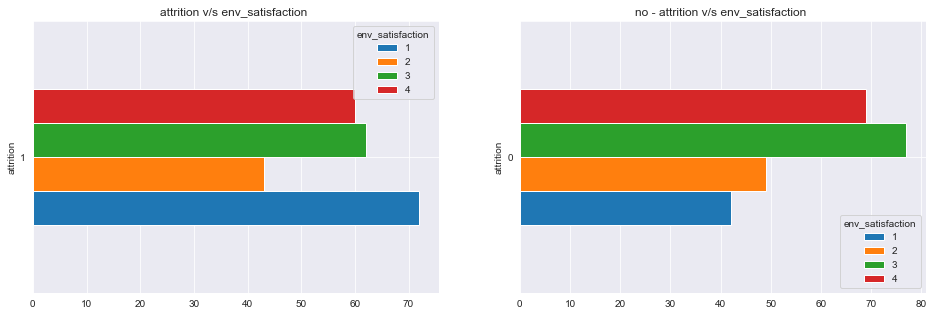

In [304]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
pd.crosstab(turnover["attrition"],turnover["env_satisfaction"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s env_satisfaction ')
pd.crosstab(no_turnover["attrition"],no_turnover["env_satisfaction"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s env_satisfaction ')
plt.show()

# 5. 'gender v/s attrition'  

*  insight :  attrition percent is more for male compared to female. 

In [305]:
plt.rcParams['figure.figsize'] = (6,6)
px.pie(turnover,turnover["gender"].value_counts().index,turnover["gender"].value_counts(),hole = 0.6)

# 6. ' jobsatisfaction v/s attrition '

* insight : jobsatisfaction  feature play's an important role ,
    
         # say for example if you are not satisified with the work you are doing ,then probably you feel demotivated towards in whatever the work your doing . 

          * from the below chart we conclude that employee with jobsatisfaction  = 1
          (being lowest) are the one who left the comapny most .
            
           # and again
            
          * from the below chart we conclude that employee with env_satistfcation  = 3 or 4
          (being  highest) are the one who did not left the comapny  .
            

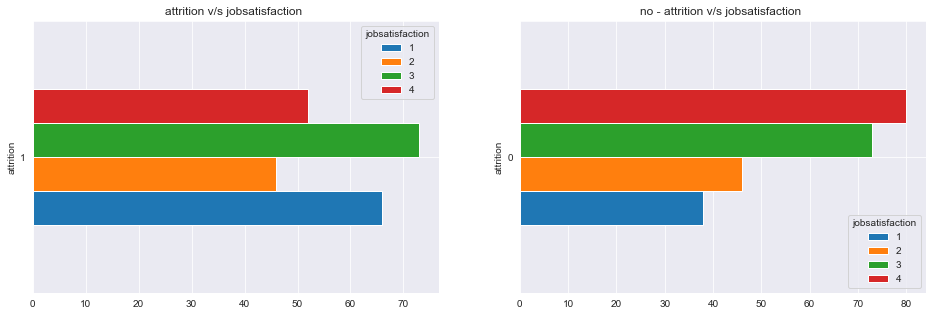

In [306]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
pd.crosstab(turnover["attrition"],turnover["jobsatisfaction"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s jobsatisfaction ')
pd.crosstab(no_turnover["attrition"],no_turnover["jobsatisfaction"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s jobsatisfaction ')
plt.show()

# 7 . ' ( jobsatisfaction + jobinvolvement ) v/s attrition '

* insight : from the below distribution curve ,we can conclude that employee with high job interest are less likely to turnover .

In [307]:
turnover["job_interest"] = turnover['jobinvolvement'] + turnover['jobsatisfaction']
no_turnover["job_interest"] = no_turnover['jobinvolvement'] + no_turnover['jobsatisfaction']

In [308]:
# create one new feature 
data["job_interest"] = data['jobinvolvement'] + data['jobsatisfaction']
data.drop(['jobinvolvement','jobsatisfaction'],axis = 1,inplace = True)

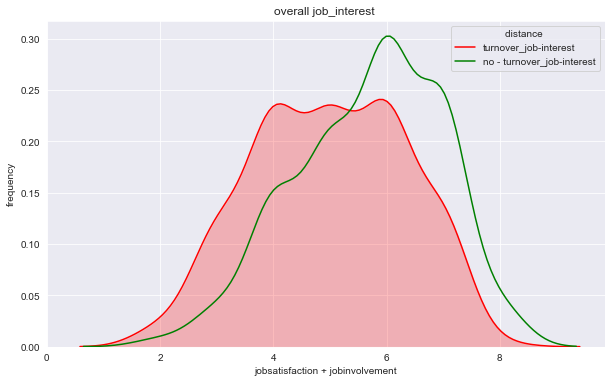

In [309]:
plt.rcParams['figure.figsize'] = (10,6)
sns.kdeplot(turnover['job_interest'],shade = True,color = "r",legend = False).set(xlim=(0))
sns.kdeplot(no_turnover['job_interest'],shade = False,color = "green").set(xlim=(0))
plt.legend(title='distance ',loc = 'best', labels=['turnover_job-interest', 'no - turnover_job-interest'])
plt.title("overall job_interest ")
plt.xlabel('jobsatisfaction + jobinvolvement')
plt.ylabel('frequency')
plt.show()

In [310]:
 data.drop(['stockoptionlevel','years_in_currentrole','years_with_current_manager ','last_promotion','hourlyrate','experience','training','years_in_company'],axis = 1,inplace = True)
data.columns

Index(['age', 'attrition', 'travel', 'department', 'dist_from_home',
       'education', 'educationfield', 'env_satisfaction', 'gender', 'joblevel',
       'jobrole', 'maritalstatus', 'monthly_salary', 'companies_worked',
       'overtime', 'hike', 'performance', 'relationship_satisfaction',
       'worklifebalance', 'job_interest'],
      dtype='object')

# 8. 'relationship_satisfaction v/s attrition'

* insight : employee with relationship satisfaction value are less likely to leave the company .

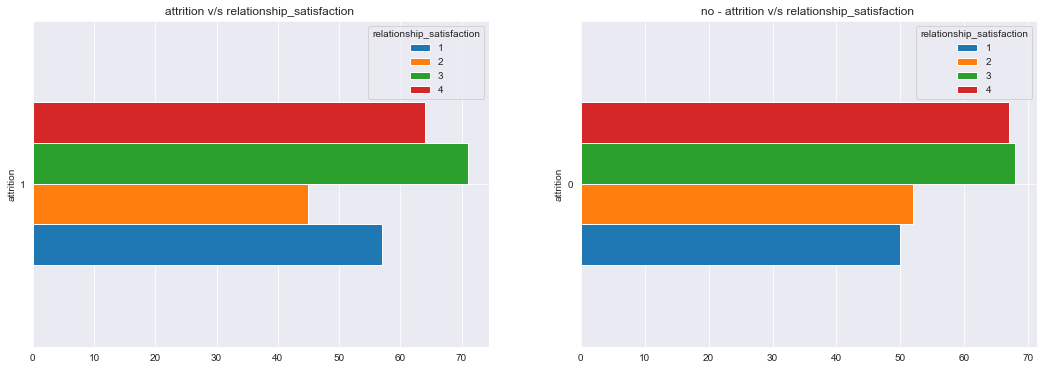

In [311]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
pd.crosstab(turnover["attrition"],turnover["relationship_satisfaction"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s relationship_satisfaction ')
pd.crosstab(no_turnover["attrition"],no_turnover["relationship_satisfaction"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s relationship_satisfaction ')
plt.show()

# 9 .  ' life_work_satisfaction v/s attrition '

In [312]:
turnover["life_work_satisfaction"] = turnover['worklifebalance'] + turnover['relationship_satisfaction']
no_turnover["life_work_satisfaction"] = no_turnover['worklifebalance'] + no_turnover['relationship_satisfaction']

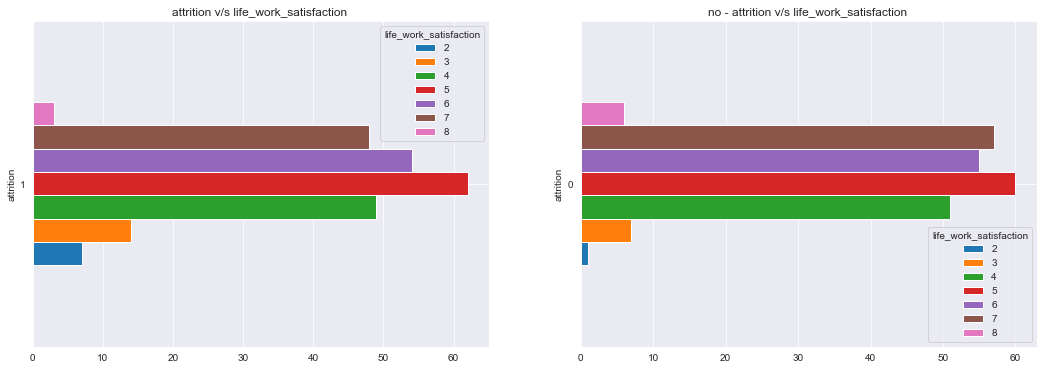

In [313]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
pd.crosstab(turnover["attrition"],turnover["life_work_satisfaction"]).plot(kind = 'barh',ax = axes[0]).set_title('attrition v/s life_work_satisfaction ')
pd.crosstab(no_turnover["attrition"],no_turnover["life_work_satisfaction"]).plot(kind = 'barh',ax = axes[1]).set_title('no - attrition v/s life_work_satisfaction ')
plt.show()

In [314]:
data['life_work_satisfaction'] = data['worklifebalance'] + data['relationship_satisfaction']
data.drop(['worklifebalance','relationship_satisfaction'],axis = 1,inplace = True)

# 10. 'hike v/s attrition '

* insight  :from the below pie chart we can conclude that most of the people who left the company is due to they are getting low hike .

In [315]:
plt.rcParams['figure.figsize'] = (6,6)
px.pie(turnover,turnover["hike"].value_counts().index,turnover["hike"].value_counts(),hole = 0.6,title = 'hike v/s attrition ')

# Let's the correlation among the features 

# insights 
  * hike v/s performance has strong correlation . 
  * joblevel v/s age has moderate correlation .  

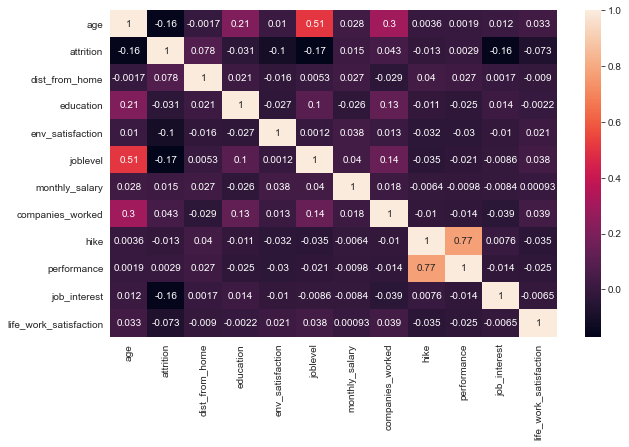

In [316]:
plt.rcParams['figure.figsize'] = (10,6)
sns.heatmap(data.corr(),annot = True)

In [317]:
# drop either any one of the feature to avoid multicollinearity problem .
# i am dropping performance blindly !
data.drop(['performance'],axis = 1,inplace = True)

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     1470 non-null   int64 
 1   attrition               1470 non-null   int64 
 2   travel                  1470 non-null   object
 3   department              1470 non-null   object
 4   dist_from_home          1470 non-null   int64 
 5   education               1470 non-null   int64 
 6   educationfield          1470 non-null   object
 7   env_satisfaction        1470 non-null   int64 
 8   gender                  1470 non-null   object
 9   joblevel                1470 non-null   int64 
 10  jobrole                 1470 non-null   object
 11  maritalstatus           1470 non-null   object
 12  monthly_salary          1470 non-null   int64 
 13  companies_worked        1470 non-null   int64 
 14  overtime                1470 non-null   object
 15  hike

# Model Building  . 

* our data is highly imbalanced ,let's make it balanced before providing it to our model .
 * i'll use undersampling technique just for sake of model building ,
   * in undersample we make decrease the majority class label up to count of minority class label .

In [319]:
attrition = data[data['attrition']==1]
no_attrition = data[data['attrition']==0].sample(len(attrition))
final = pd.concat([attrition,no_attrition],axis = 0)
print("attrition shape : ",attrition.shape)
print("no_attrition shape : ",no_attrition.shape)
print("final df  shape : ",final.shape)


attrition shape :  (237, 18)
no_attrition shape :  (237, 18)
final df  shape :  (474, 18)


Text(0.5, 1.0, 'Target is Balanced')

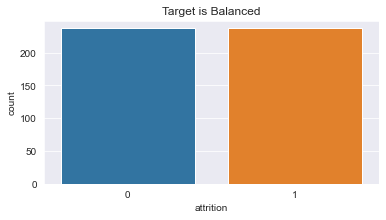

In [320]:
plt.rcParams['figure.figsize'] = (6,3)
sns.countplot(final['attrition']).set_title("Target is Balanced")

In [321]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 1418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     474 non-null    int64 
 1   attrition               474 non-null    int64 
 2   travel                  474 non-null    object
 3   department              474 non-null    object
 4   dist_from_home          474 non-null    int64 
 5   education               474 non-null    int64 
 6   educationfield          474 non-null    object
 7   env_satisfaction        474 non-null    int64 
 8   gender                  474 non-null    object
 9   joblevel                474 non-null    int64 
 10  jobrole                 474 non-null    object
 11  maritalstatus           474 non-null    object
 12  monthly_salary          474 non-null    int64 
 13  companies_worked        474 non-null    int64 
 14  overtime                474 non-null    object
 15  hike 

In [322]:
final = pd.get_dummies(final,drop_first = True)
final.shape

(474, 32)

In [323]:
x = final.drop('attrition',axis = 1)
y = final['attrition']

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,log_loss
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 33)

# Random Forest Classifier .

In [325]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150,min_samples_split = 20,min_samples_leaf = 5,random_state = 33)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [326]:
ypred = rf.predict(xtest)

In [327]:
print("classification - report ")
print(classification_report(ytest,ypred))

classification - report 
              precision    recall  f1-score   support

           0       0.79      0.60      0.68        90
           1       0.52      0.74      0.61        53

    accuracy                           0.65       143
   macro avg       0.66      0.67      0.65       143
weighted avg       0.69      0.65      0.66       143



In [328]:
print("confusion matrix  - report ")
print(confusion_matrix(ytest,ypred))

confusion matrix  - report 
[[54 36]
 [14 39]]


In [329]:
print("cost function ")
print(log_loss(ytest,ypred))

cost function 
12.076696540230918


# Thank You : )